### Manuel Ibañez

#### Import Libraries

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA  # Para reducción dimensional (visualización)
%matplotlib inline

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [5]:
df = pd.read_csv("clustering-lab-ManuelSalazar0119/Live.csv")
df.head()

,Unnamed: 0,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,year,month,day,hour,day_of_week,total_reactions,engagement
0,0,246675545449582_1649696485147474,video,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0,2018,4,22,6,6,529,1303
1,1,246675545449582_1649426988507757,photo,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0,2018,4,21,22,5,150,150
2,2,246675545449582_1648730588577397,video,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0,2018,4,21,6,5,227,520
3,3,246675545449582_1648576705259452,photo,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0,2018,4,21,2,5,111,111
4,4,246675545449582_1645700502213739,photo,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0,2018,4,18,3,2,213,213


In [6]:
df.isnull().sum()

Unnamed: 0          0
status_id           0
status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
year                0
month               0
day                 0
hour                0
day_of_week         0
total_reactions     0
engagement          0
dtype: int64

<Axes: >

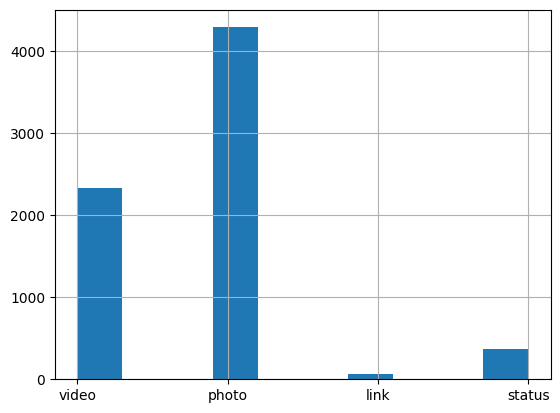

In [6]:
df['status_type'].hist()

In [8]:
df.columns

Index(['Unnamed: 0', 'status_id', 'status_type', 'status_published',
       'num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves',
       'num_wows', 'num_hahas', 'num_sads', 'num_angrys', 'year', 'month',
       'day', 'hour', 'day_of_week', 'total_reactions', 'engagement'],
      dtype='object')

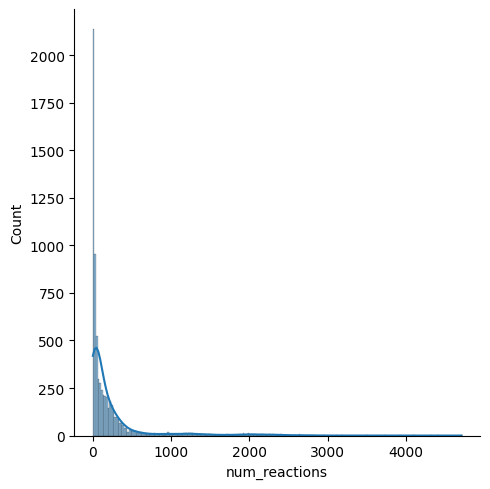

In [10]:
sns.displot(x='num_reactions', data=df, kde=True)

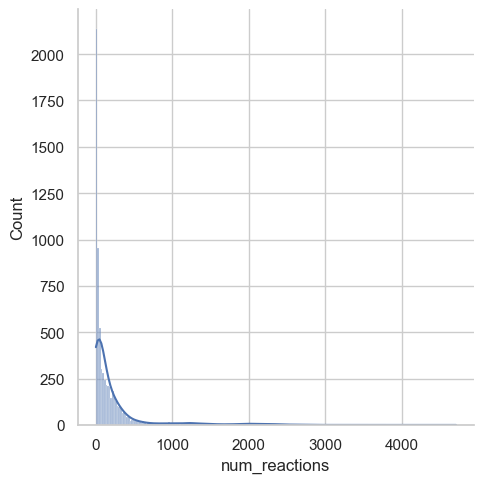

In [7]:
sns.displot(x='num_reactions', data=df, kde=True)

In [12]:
x = df[['num_reactions', 'num_comments', 'num_shares', 'num_likes']].iloc[:,].values
x

array([[529, 512, 262, 432],
       [150,   0,   0, 150],
       [227, 236,  57, 204],
       ...,
       [  2,   0,   0,   1],
       [351,  12,  22, 349],
       [ 17,   0,   0,  17]], shape=(7050, 4))

Text(0, 0.5, 'Ylabel')

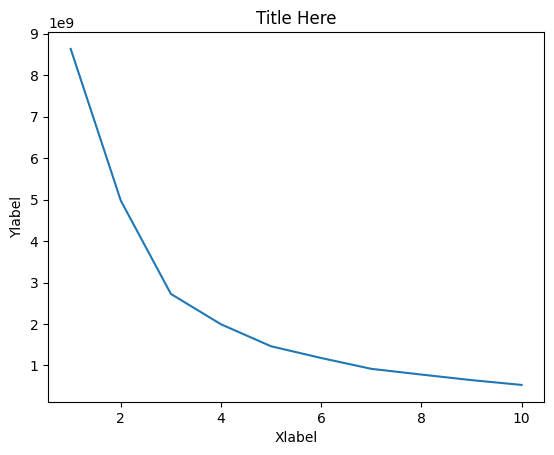

In [16]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Title Here')
plt.xlabel('Xlabel')
plt.ylabel('Ylabel')

In [17]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([0, 0, 0, ..., 0, 0, 0], shape=(7050,), dtype=int32)

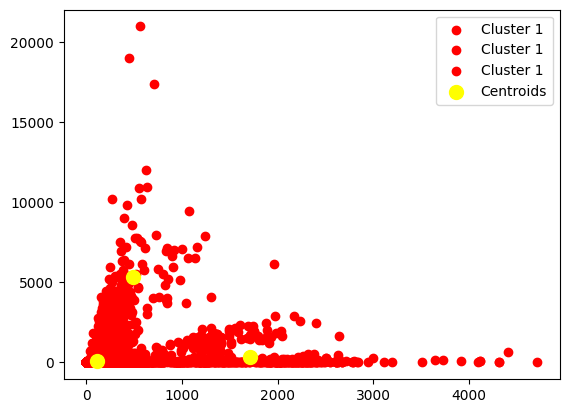

In [18]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], c='red', label='Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], c='red', label='Cluster 1')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], c='red', label='Cluster 1')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='yellow', s=100, label='Centroids')
plt.legend()


## Carga y Exploración Inicial

In [9]:
# Cargar datos
df_live = pd.read_csv('clustering-lab-ManuelSalazar0119/Live.csv')

# Eliminar columnas no relevantes
df_live.drop(['status_id', 'status_published', 'Unnamed: 0'], axis=1, inplace=True, errors='ignore')

# Mostrar estructura
print(f"Filas: {df_live.shape[0]}, Columnas: {df_live.shape[1]}")
print("\nPrimeras filas:")
display(df_live.head())

# Verificar nulos
print("\nValores nulos por columna:")
print(df_live.isnull().sum())

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
display(df_live.describe())

Filas: 7050, Columnas: 17

Primeras filas:


,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,year,month,day,hour,day_of_week,total_reactions,engagement
0,video,529,512,262,432,92,3,1,1,0,2018,4,22,6,6,529,1303
1,photo,150,0,0,150,0,0,0,0,0,2018,4,21,22,5,150,150
2,video,227,236,57,204,21,1,1,0,0,2018,4,21,6,5,227,520
3,photo,111,0,0,111,0,0,0,0,0,2018,4,21,2,5,111,111
4,photo,213,0,0,204,9,0,0,0,0,2018,4,18,3,2,213,213



Valores nulos por columna:
status_type        0
num_reactions      0
num_comments       0
num_shares         0
num_likes          0
num_loves          0
num_wows           0
num_hahas          0
num_sads           0
num_angrys         0
year               0
month              0
day                0
hour               0
day_of_week        0
total_reactions    0
engagement         0
dtype: int64

Estadísticas descriptivas:


,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,year,month,day,hour,day_of_week,total_reactions,engagement
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,2016.382128,6.577730,15.792624,7.829504,3.015035,230.114468,494.493050
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,1.943176,3.587108,8.728489,6.886893,2.012812,462.624061,1152.169099
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2012.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,3.000000,8.000000,2.000000,1.000000,17.000000,19.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,6.000000,16.000000,7.000000,3.000000,59.500000,69.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,2018.000000,10.000000,23.000000,9.000000,5.000000,219.000000,419.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,2018.000000,12.000000,31.000000,23.000000,6.000000,4710.000000,21708.000000


# Preprocesamiento

In [10]:
# Seleccionar  numéricas
features_live = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']
X_live = df_live[features_live]

# Estandarizar datos (importante para DBSCAN y KMeans)
scaler = StandardScaler()
X_live_scaled = scaler.fit_transform(X_live)

# Reducción dimensional para visualización (opcional)
pca = PCA(n_components=2)
X_live_pca = pca.fit_transform(X_live_scaled)

# KMeans Clustering

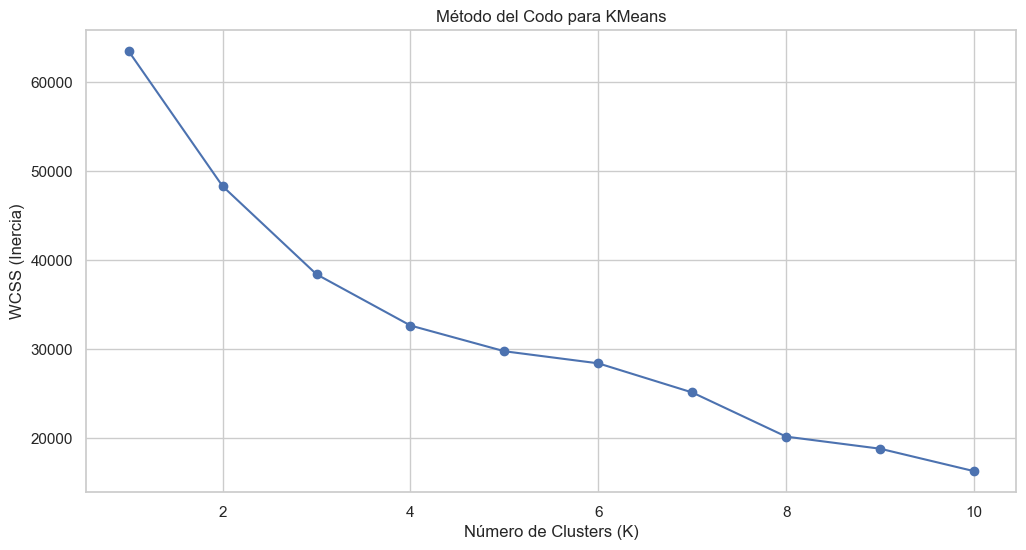

Silhouette Score (KMeans): 0.76


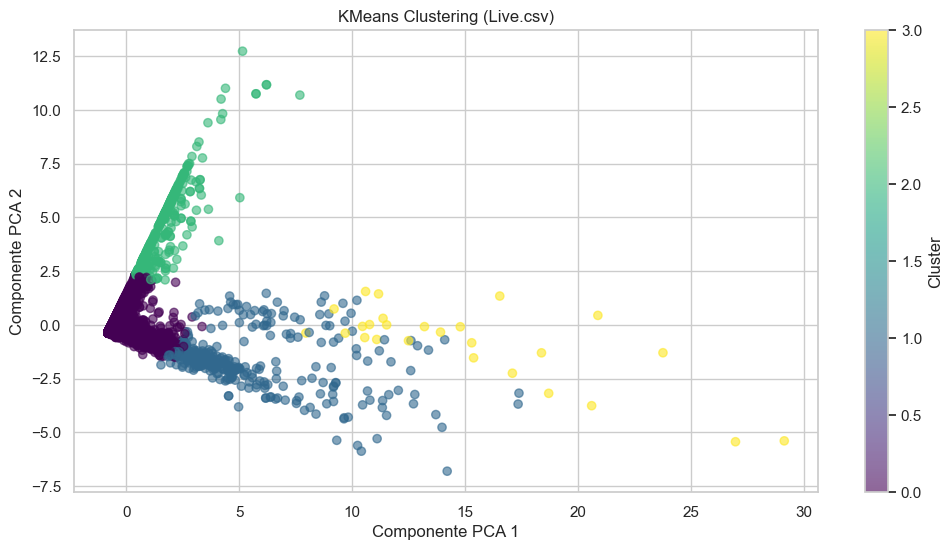

In [11]:
# Método del codo para elegir K
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_live_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método del Codo para KMeans')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('WCSS (Inercia)')
plt.show()

# Aplicar KMeans con K óptimo (ejemplo: K=4)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_live_scaled)

# Evaluación con Silhouette Score
silhouette_avg = silhouette_score(X_live_scaled, kmeans_labels)
print(f"Silhouette Score (KMeans): {silhouette_avg:.2f}")

# Visualización (usando PCA)
plt.scatter(X_live_pca[:, 0], X_live_pca[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.6)
plt.title('KMeans Clustering (Live.csv)')
plt.xlabel('Componente PCA 1')
plt.ylabel('Componente PCA 2')
plt.colorbar(label='Cluster')
plt.show()

# DBSCAN Clustering

Número de clusters (DBSCAN): 1


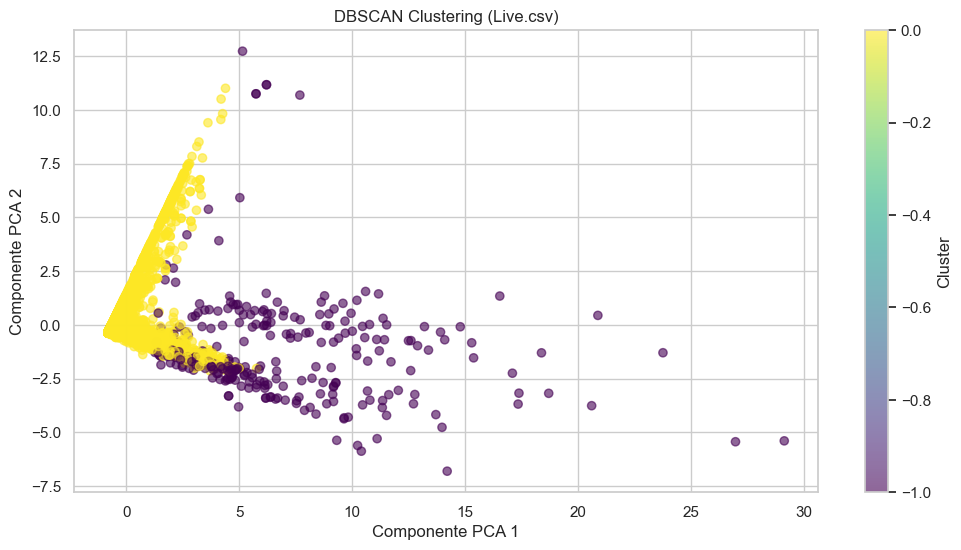

In [ ]:
# Aplicar DBSCAN 
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_live_scaled)

# clusters encontrados (sin contar ruido)
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f"Número de clusters (DBSCAN): {n_clusters}")

# Evaluación (solo si no hay mucho ruido)
if n_clusters > 1:
    silhouette_avg = silhouette_score(X_live_scaled, dbscan_labels)
    print(f"Silhouette Score (DBSCAN): {silhouette_avg:.2f}")

plt.scatter(X_live_pca[:, 0], X_live_pca[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.6)
plt.title('DBSCAN Clustering (Live.csv)')
plt.xlabel('Componente PCA 1')
plt.ylabel('Componente PCA 2')
plt.colorbar(label='Cluster')
plt.show()